In [ ]:
#Disease Prediction from Medical Data
#Create a model to predict the likelihood of a disease based on medical data (e.g., symptoms, patient history).
#Use datasets with labeled medical records and apply classification algorithms.

In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
# Display the first few rows and information about the data
print("Original Data Head:")
print(df.head())

Original Data Head:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Check the distribution of the target variable ('HeartDisease')
print("\nTarget Variable Distribution:")
print(df['HeartDisease'].value_counts())


Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [ ]:
# Encode categorical columns
# Identify the categorical columns based on the dataset's description or by inspecting unique values
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    # Use LabelEncoder for simplicity as these are nominal categories
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

print("\nData after Encoding Categorical Features:")
print(df.head())



Data after Encoding Categorical Features:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
# Split features (X) and target (y)
# 'HeartDisease' is the target variable we want to predict
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [ ]:
# Scale numeric features
# It's good practice to scale numerical features for many models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (734, 11)
Testing data shape: (184, 11)


In [ ]:
# Train model
# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
# Evaluate the model using common classification metrics
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8804347826086957
Confusion Matrix:
 [[66 11]
 [11 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



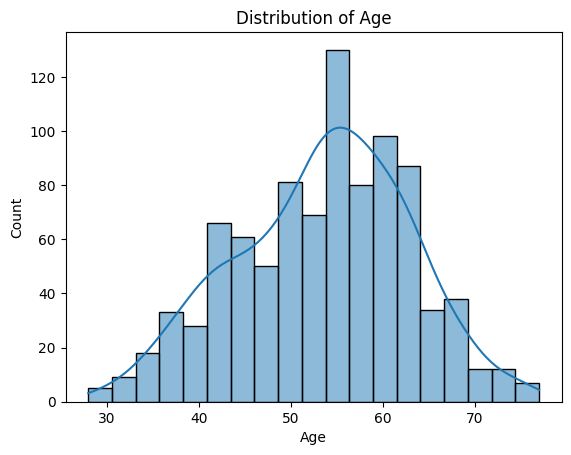

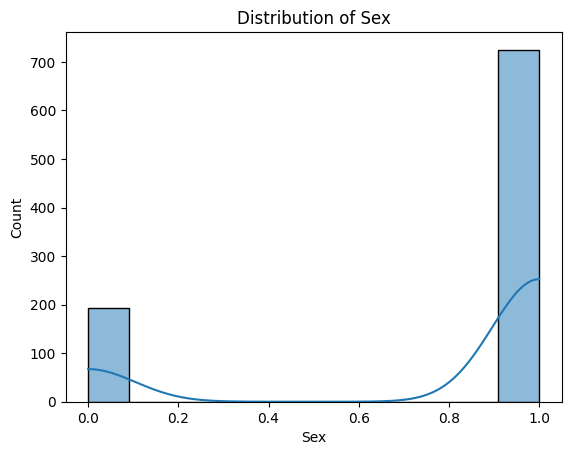

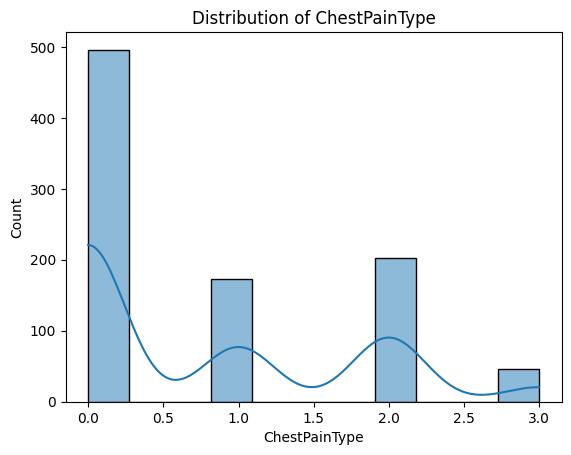

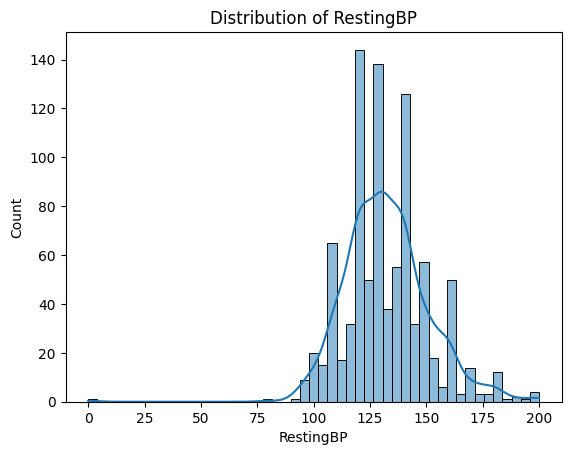

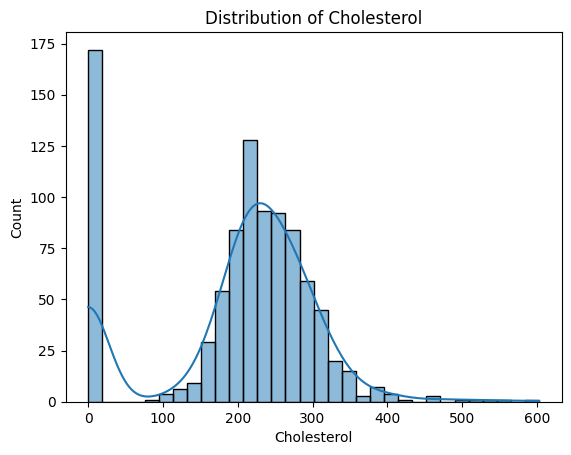

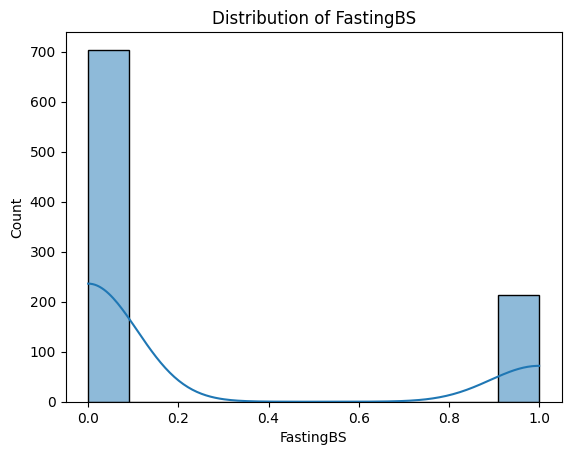

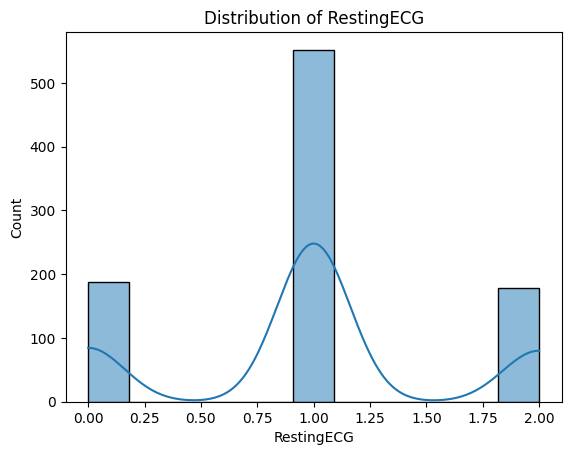

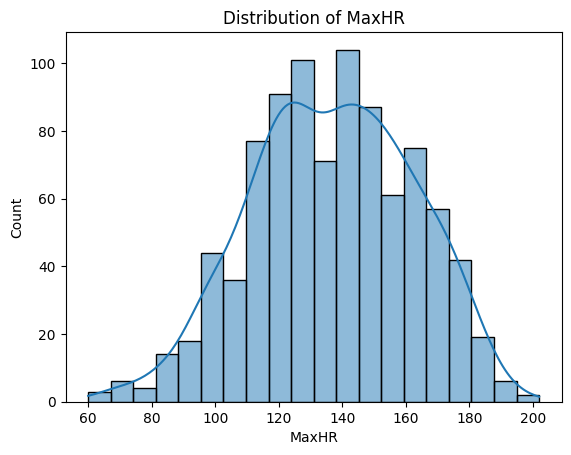

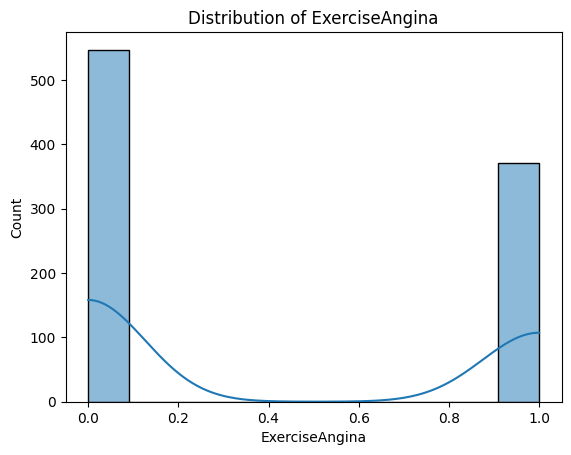

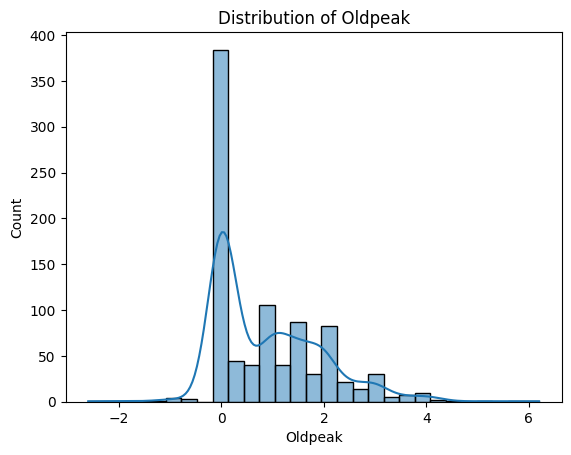

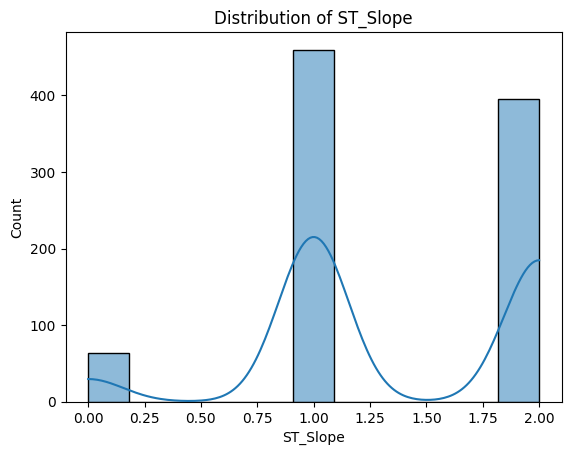

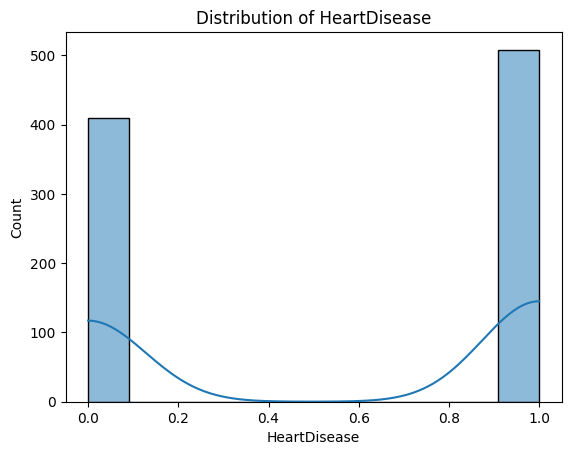

In [ ]:
# Visualize some numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('target', errors='ignore') # Exclude target

for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


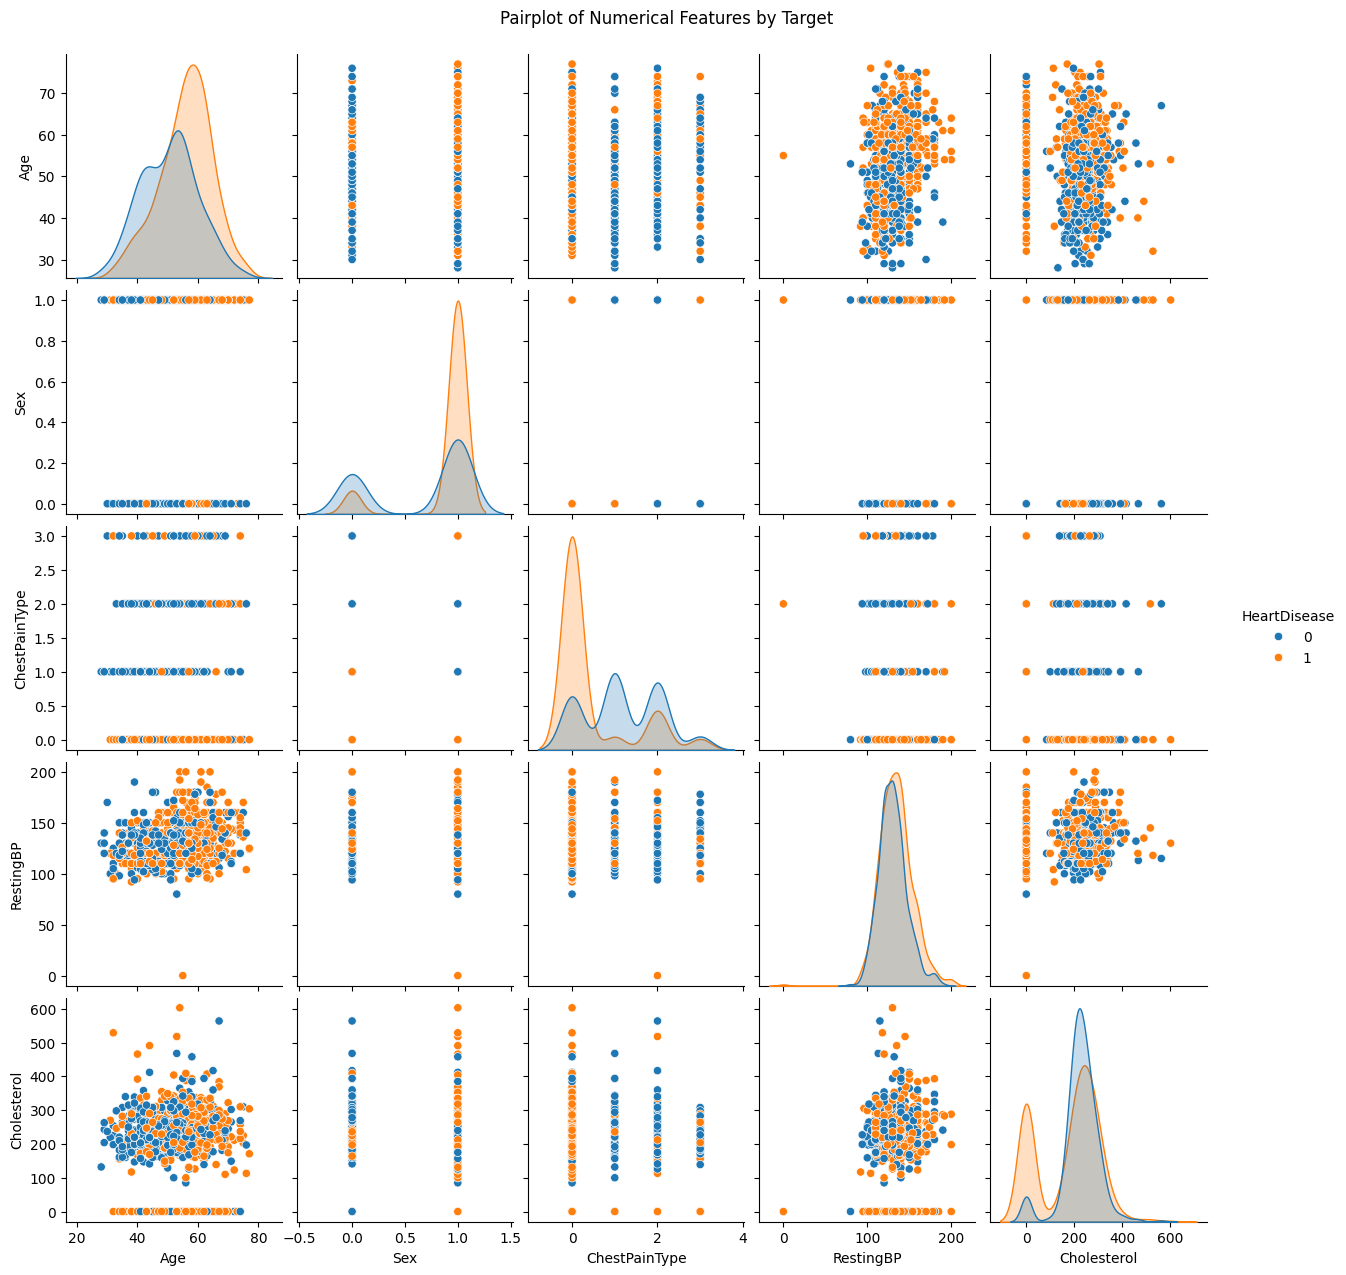

In [ ]:
num_features_for_pairplot = numerical_features[:5]
sns.pairplot(df[num_features_for_pairplot.tolist() + ['HeartDisease']], hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
plt.show()

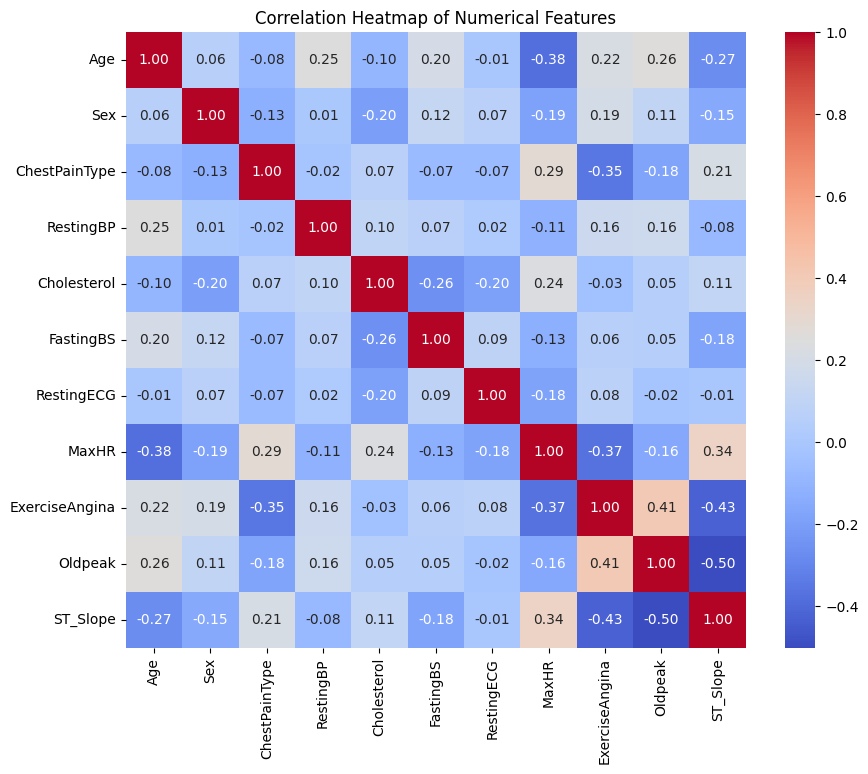

In [ ]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

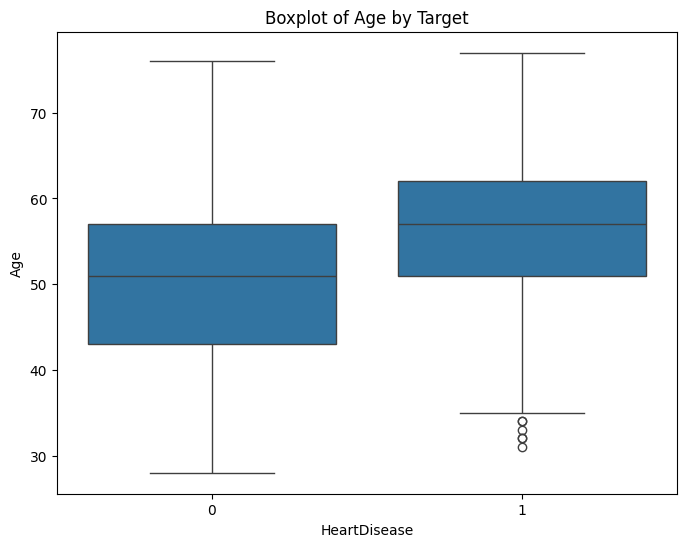

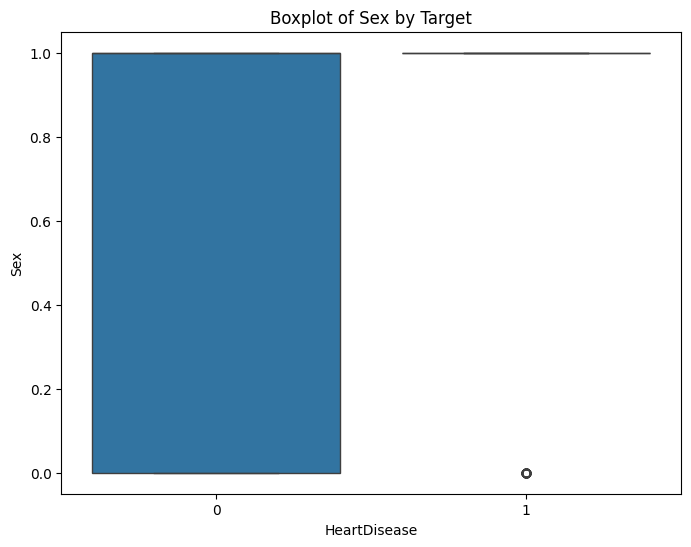

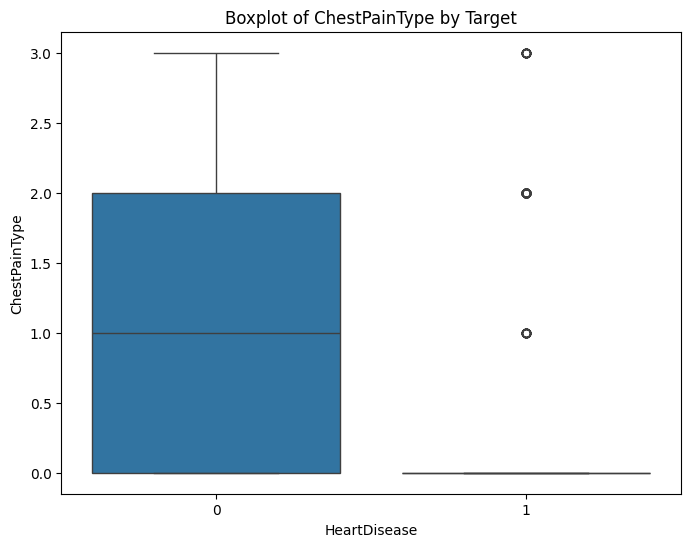

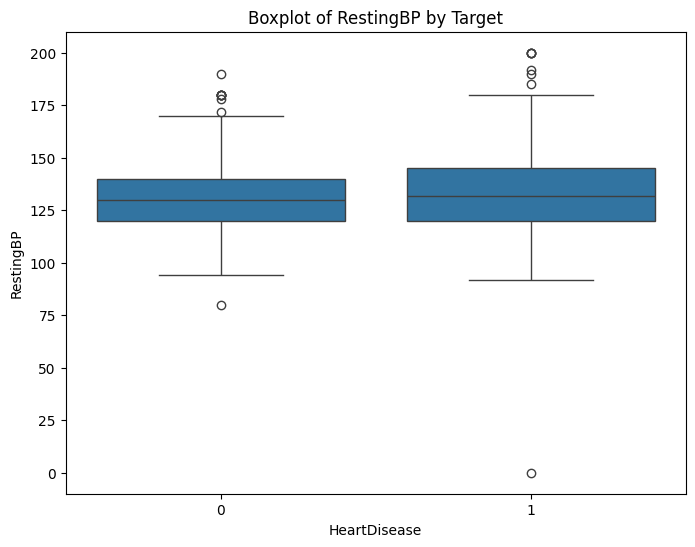

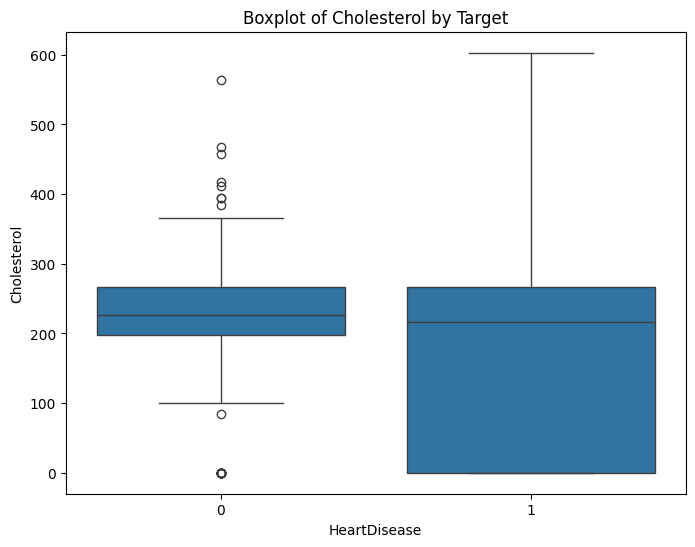

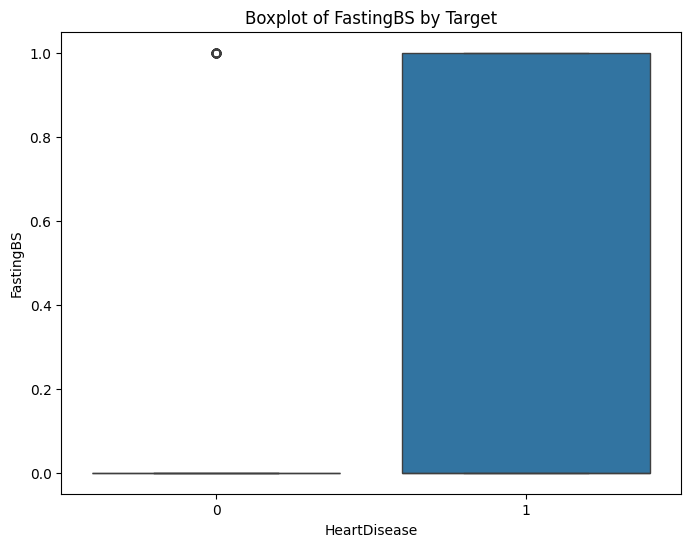

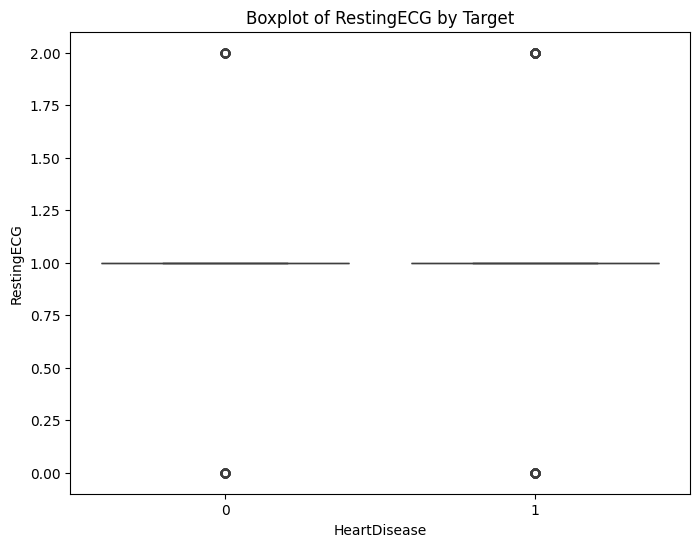

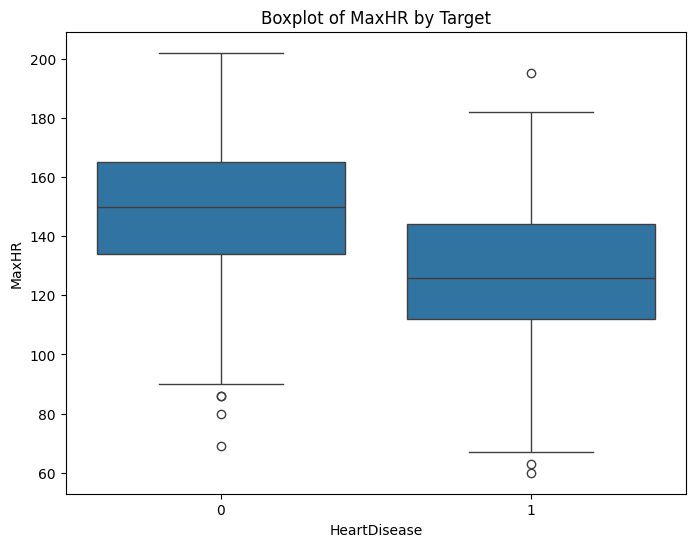

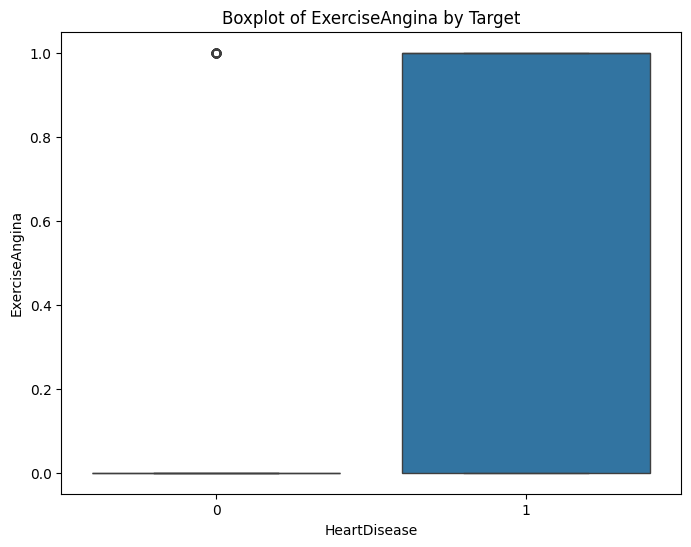

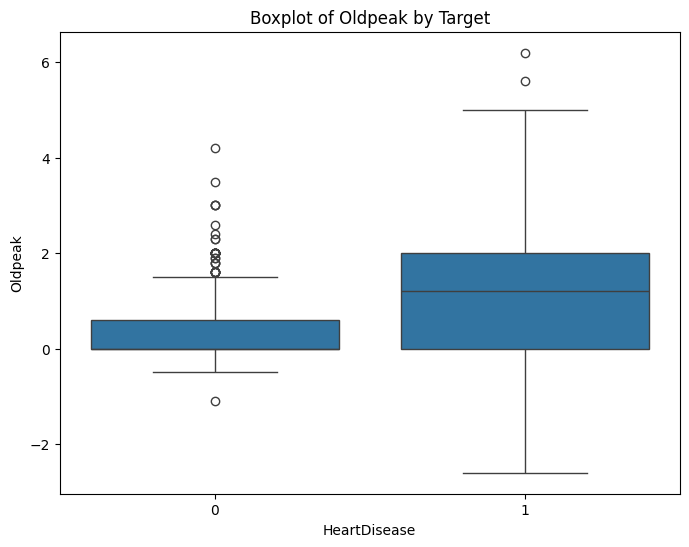

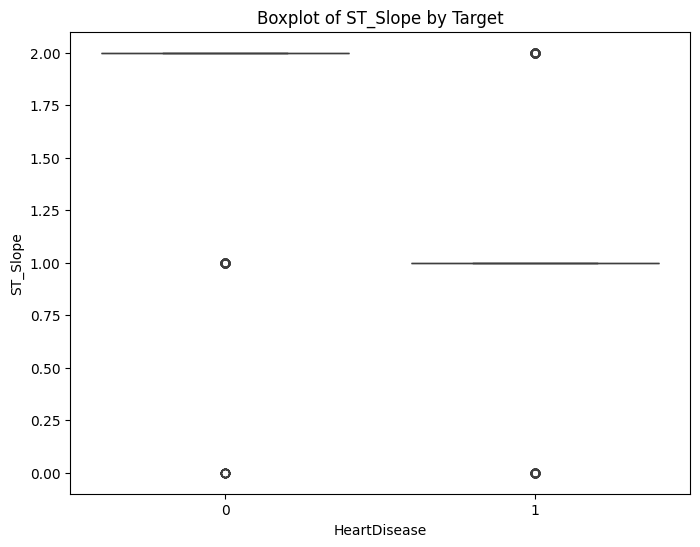

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HeartDisease', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.show()

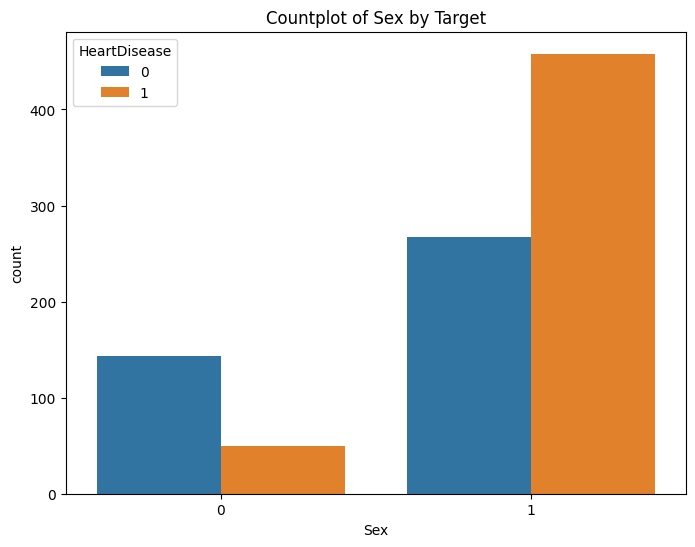

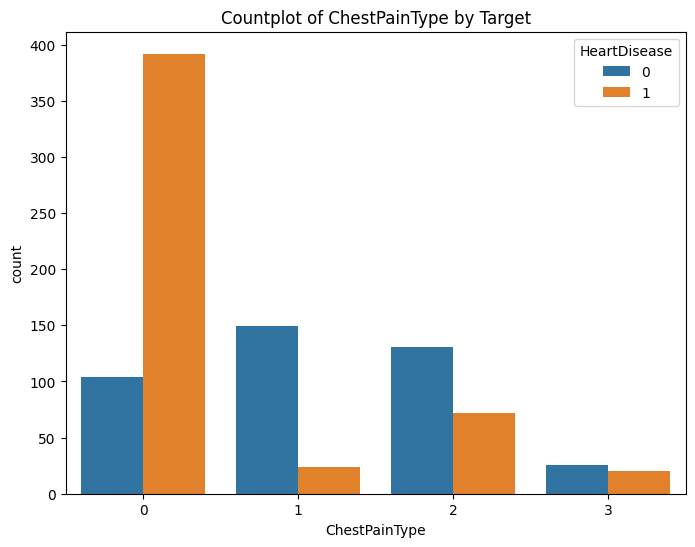

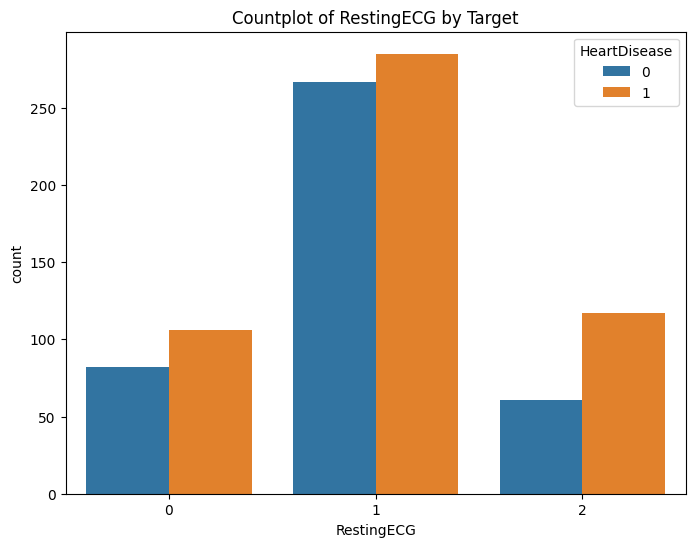

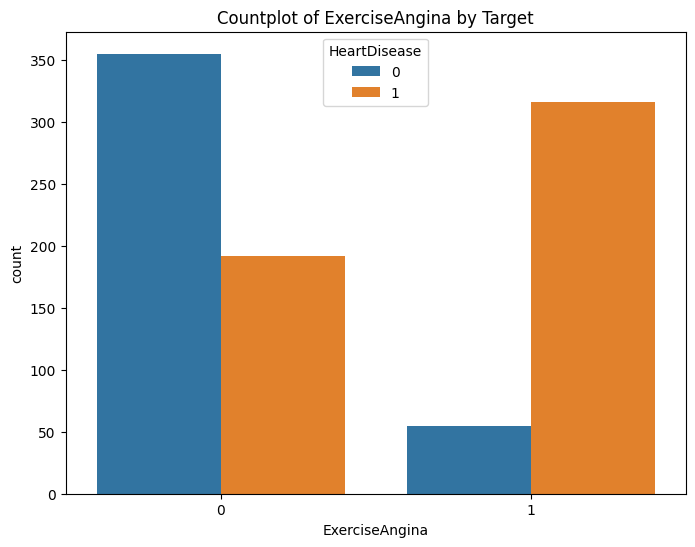

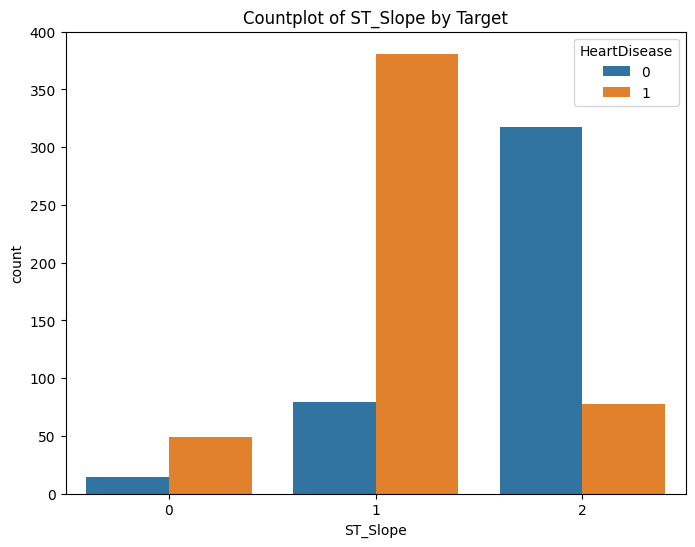

In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f'Countplot of {feature} by Target')
    plt.show()